In [1]:
%cd ../..
%run cryptolytic/notebooks/init.ipynb
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"
import pandas as pd
import tensorflow as tf
import cryptolytic.util as util
import cryptolytic.start as start
import cryptolytic.viz.plot as plot
import cryptolytic.data.sql as sql
import cryptolytic.data as d
from cryptolytic.util import *
import cryptolytic.data.historical as h
import cryptolytic.model as m
import cryptolytic.model.lstm_framework as lstm
import cryptolytic.model.model_framework as mfw
import cryptolytic.model.data_work as dw
import cryptolytic.model.hyperparameter as hyper
import cryptolytic.model.cron_model as cron_model


from matplotlib.pylab import rcParams
from IPython.core.display import HTML
from pandas.plotting import register_matplotlib_converters # to stop a warning message
import cryptolytic.model.model_framework as mf

ohclv = ['open', 'high', 'close', 'low', 'volume']
plt.style.use('ggplot')
rcParams['figure.figsize'] = 20,7
start.init()
register_matplotlib_converters()


# Make math readable
HTML("""
<style>
.MathJax {
    font-size: 2rem;
}
</style>""")

/home/me/Documents/Git/Lambda-School-Labs/cryptolytic-ds
Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


In [2]:
import os
history_size = 400
input_len = 16000
lahead = 12*3
step = 2
period = 300
to_drop = lahead - 1
input_len = input_len + to_drop
batch_size = 200

df_orig = None
df_orig = d.get_df({'start':'06-01-2019', 'period':period, 'trading_pair':'btc_usd', 'exchange_id':'bitfinex'},
               n=input_len)

df                           api  exchange trading_pair   timestamp  period  \
datetime                                                                   
2019-01-06 06:00:00  bitfinex  bitfinex      btc_usd  1546754400     300   
2019-01-06 06:05:00  bitfinex  bitfinex      btc_usd  1546754700     300   
2019-01-06 06:10:00  bitfinex  bitfinex      btc_usd  1546755000     300   
2019-01-06 06:15:00  bitfinex  bitfinex      btc_usd  1546755300     300   
2019-01-06 06:20:00  bitfinex  bitfinex      btc_usd  1546755600     300   
...                       ...       ...          ...         ...     ...   
2019-03-03 07:35:00  bitfinex  bitfinex      btc_usd  1551598500     300   
2019-03-03 07:40:00  bitfinex  bitfinex      btc_usd  1551598800     300   
2019-03-03 07:45:00  bitfinex  bitfinex      btc_usd  1551599100     300   
2019-03-03 07:50:00  bitfinex  bitfinex      btc_usd  1551599400     300   
2019-03-03 07:55:00  bitfinex  bitfinex      btc_usd  1551599700     300   

        

In [3]:
# import ta
# df = df_orig
# df = df.sort_index()
# df = df._get_numeric_data().drop(["period"], axis=1, errors='ignore')
# df = df.filter(regex="(?!timestamp_.*)", axis=1) # filter out timestapm_ metrics
# df = ta.add_all_ta_features(df, open="open", high="high", low="low", close="close", volume="volume").dropna(axis=1)
# df_diff = (df - df.shift(1, fill_value=0)).rename(lambda x: x+'_diff', axis=1)
# df = pd.concat([df, df_diff], axis=1)
# dataset = dw.normalize(df.values)
# target = df.columns.get_loc('close') 
# y = dataset[:, target]
# history = {'loss' : [], 'val_loss' : []}

/home/me/anaconda3/lib/python3.7/site-packages/ta/trend.py:543: RuntimeWarning:

invalid value encountered in double_scalars

/home/me/anaconda3/lib/python3.7/site-packages/ta/trend.py:547: RuntimeWarning:

invalid value encountered in double_scalars



In [4]:
# x_train, y_train, x_val, y_val = dw.windowed(dataset, target, batch_size, history_size, step, lahead)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/home/me/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3326, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-4-cd5fbfad7eeb>", line 1, in <module>
    x_train, y_train, x_val, y_val = dw.windowed(dataset, target, batch_size, history_size, step, lahead)
  File "/home/me/Documents/Git/Lambda-School-Labs/cryptolytic-ds/cryptolytic/model/data_work.py", line 86, in windowed
    xs = np.array(xs)
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/me/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3326, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/me/anaconda3/lib/python3.7/site-packages/IPython/core/interacti

KeyboardInterrupt: 

In [5]:
print ('Single window of past history : {}'.format(x_train[0].shape))
print ('\n Number of candles to predict : {}'.format(y_train[0].shape))

NameError: name 'x_train' is not defined

In [6]:
params = {'filters1': 32, 'noise1': 0.007044669933974564, 'filtershape1': [48, 48, 96], 'filtershape2': [64, 64, 128]}
model = mfw.create_model(x_train, params)

NameError: name 'x_train' is not defined

In [7]:
model = mfw.fit_model(model, x_train, y_train, x_val, y_val)

NameError: name 'model' is not defined

In [8]:
# Predictions on training set
rcParams['figure.figsize'] = 20,9
preds = model.predict(x_train)[:, 0]
n = len(preds)
h = history_size
hn = n+history_size
yo= len(x_val)+history_size
z = yo
modman = len(df)% batch_size
w = z + len(df)%modman

# plt.plot(range(n), d.denoise(df['close'][h:hn], 400), label='actual', color='green')
# plt.plot(range(n), d.denoise(preds[:n], 5), label='predicted');
# plt.plot(range(n), df.close_mean.values[h:hn], label='Mean')

plt.plot(y_train[:, 0], label='Train')
plt.plot(d.denoise(preds, 5), label='Preds')
plt.legend();

NameError: name 'model' is not defined

In [33]:
# Predictions on validation set
yo = dw.denormalize(model.predict(x_val)[:, 0], df, 'close')
y_actual = dw.denormalize(y_val[:, 0], df, 'close')
plt.plot(yo, label='predicted')
plt.plot(y_actual, label='actual')
plt.legend()

NameError: name 'model' is not defined

In [ ]:
cron_model.run_model()

df                           api  exchange trading_pair   timestamp  period  \
datetime                                                                   
2019-12-03 11:55:00  bitfinex  bitfinex      btc_usd  1575374100     300   
2019-12-03 12:00:00  bitfinex  bitfinex      btc_usd  1575374400     300   
2019-12-03 12:05:00  bitfinex  bitfinex      btc_usd  1575374700     300   
2019-12-03 12:10:00  bitfinex  bitfinex      btc_usd  1575375000     300   
2019-12-03 12:15:00  bitfinex  bitfinex      btc_usd  1575375300     300   
...                       ...       ...          ...         ...     ...   
2020-01-28 02:20:00  bitfinex  bitfinex      btc_usd  1580178000     300   
2020-01-28 02:25:00  bitfinex  bitfinex      btc_usd  1580178300     300   
2020-01-28 02:30:00  bitfinex  bitfinex      btc_usd  1580178600     300   
2020-01-28 02:35:00  bitfinex  bitfinex      btc_usd  1580178900     300   
2020-01-28 02:40:00  bitfinex  bitfinex      btc_usd  1580179200     300   

        

In [37]:
preds, y_train, df = cron_model.cron_pred()

df                           api  exchange trading_pair   timestamp  period  \
datetime                                                                   
2019-12-03 11:40:00  bitfinex  bitfinex      btc_usd  1575373200     300   
2019-12-03 11:45:00  bitfinex  bitfinex      btc_usd  1575373500     300   
2019-12-03 11:50:00  bitfinex  bitfinex      btc_usd  1575373800     300   
2019-12-03 11:55:00  bitfinex  bitfinex      btc_usd  1575374100     300   
2019-12-03 12:00:00  bitfinex  bitfinex      btc_usd  1575374400     300   
...                       ...       ...          ...         ...     ...   
2020-01-28 02:20:00  bitfinex  bitfinex      btc_usd  1580178000     300   
2020-01-28 02:25:00  bitfinex  bitfinex      btc_usd  1580178300     300   
2020-01-28 02:30:00  bitfinex  bitfinex      btc_usd  1580178600     300   
2020-01-28 02:35:00  bitfinex  bitfinex      btc_usd  1580178900     300   
2020-01-28 02:40:00  bitfinex  bitfinex      btc_usd  1580179200     300   

        

/home/me/anaconda3/lib/python3.7/site-packages/ta/trend.py:543: RuntimeWarning:

invalid value encountered in double_scalars

/home/me/anaconda3/lib/python3.7/site-packages/ta/trend.py:547: RuntimeWarning:

invalid value encountered in double_scalars



[[-0.8998627  -0.41637868 -0.52679753 ... -1.1221488  -1.0586824
  -1.3197885 ]
 [-1.3651206  -0.5735067  -0.4390948  ... -1.0641434  -0.81988674
  -0.7781615 ]
 [-0.7165834  -0.31160367 -0.39106733 ... -1.0044996  -0.80907565
  -0.78306496]
 ...
 [ 2.320932    1.7632205   2.0968955  ...  1.8825208   1.9806085
   1.2565916 ]
 [ 1.9322296   1.2762518   2.4448702  ...  1.2582979   1.8729043
   1.8255593 ]
 [ 1.820575    2.2261076   1.8670684  ...  1.8206542   2.3785179
   1.869489  ]]


In [12]:
preds.shape, y_train.shape, df.shape

((15600, 36), (15600, 0), (16024, 112))

In [13]:
df.head()

,timestamp,open,close,high,low,volume,high_m_low,close_m_open,arb_diff,arb_signal,...,trend_psar_diff,trend_psar_up_indicator_diff,trend_psar_down_indicator_diff,momentum_rsi_diff,momentum_stoch_diff,momentum_stoch_signal_diff,momentum_wr_diff,momentum_ao_diff,others_dr_diff,others_cr_diff
datetime,,,,,,,,,,,,,,,,,,,,,
2019-12-03 11:25:00,1575372300,7319.700000,7315.1,7319.8,7315.1,4.007049,4.7,-4.600000,31.433333,0.431559,...,7315.100,0.0,0.0,100.000000,0.000000,0.000000,-100.000000,0.0,-5.241534,0.000000
2019-12-03 11:30:00,1575372600,7315.124015,7320.3,7320.9,7315.0,8.214197,5.9,5.175985,28.446667,0.390116,...,5.200,0.0,0.0,0.000000,89.830508,44.915254,89.830508,0.0,5.312620,0.071086
2019-12-03 11:35:00,1575372900,7319.700000,7315.1,7319.9,7315.1,1.016605,4.8,-4.600000,30.810000,0.422965,...,-0.500,0.0,1.0,-51.851852,-88.135593,-14.406780,-88.135593,0.0,-0.142121,-0.071086
2019-12-03 11:40:00,1575373200,7315.160900,7315.2,7315.2,7315.1,3.673332,0.1,0.039100,30.683333,0.421213,...,1.100,0.0,-1.0,0.550898,1.694915,1.129944,1.694915,0.0,0.072402,0.001367
2019-12-03 11:45:00,1575373500,7315.100000,7315.0,7315.2,7315.0,3.235614,0.2,-0.100000,34.140000,0.468901,...,-0.116,0.0,0.0,-1.089471,-3.389831,-29.943503,-3.389831,0.0,-0.004101,-0.002734


tnh
1
Mu 8.948569518259522 Std 0.07826243385655574


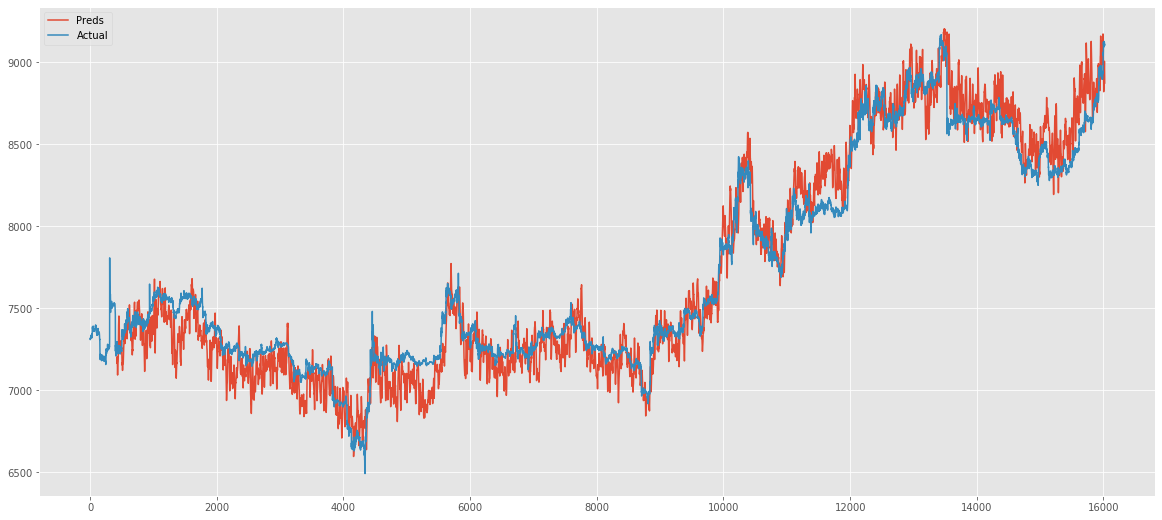

In [65]:
rcParams['figure.figsize'] = 20,9
de_preds = dw.denormalize(preds[:, 0], df, 'close')

plus = df.shape[0] - de_preds.shape[0]

#target = df.columns.get_loc('close')
#plt.plot(y_train, label='Train')
plt.plot(range(df.shape[0]-plus,df.shape[0]), d.denoise(de_preds, 5), label='Preds')
plt.plot(range(), df.iloc[:, target], label='Actual')
plt.legend();

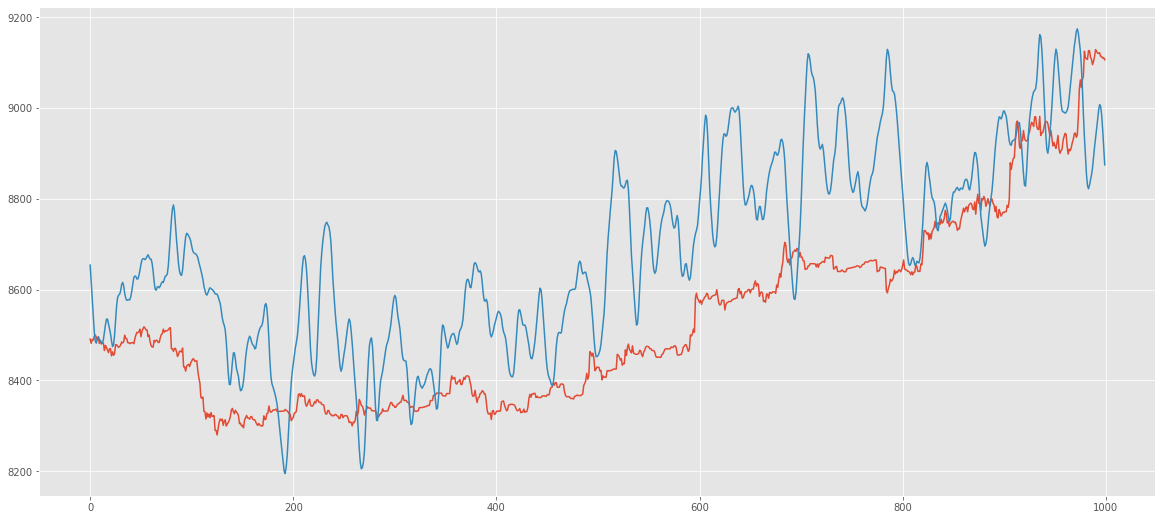

In [73]:
_preds = de_preds[-1000:]
_actual = df.iloc[-1000:]
plt.plot(range(len(_actual)), _actual.iloc[:, target])
plt.plot(range(len(_actual)), d.denoise(_preds, 5))

In [64]:
de_preds.shape, df.shape

((15600,), (16021, 112))

In [51]:
de_preds = dw.denormalize(preds[:, 0], df, 'close')


tnh
1
Mu 8.948569518259522 Std 0.07826243385655574


In [50]:
preds.shape

(15600, 36)

In [43]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [41]:
preds.max(), de_preds.max()

(3.2830007, 11963655000.0)

In [32]:
dw.denormalize(dw.normalize(df['close'][:, 0]), df, 'close').max()

ValueError: Can only tuple-index with a MultiIndex

In [29]:
dw.normalize(df['close'])

array([[-0.64820572],
       [-0.63912669],
       [-0.64820572],
       ...,
       [ 2.15427868],
       [ 2.15582148],
       [ 2.14950885]])